# Task 1: Let's play cards! #

You have a large deck made of the following cards in equal proportion: A, 2, 4, 8, 16, 32, 64. Each card is worth the number of points equal to the number it represents (2 = 2 points, 4 = 4 points, etc), with the ace A = 1 point.
You iteratively draw cards from the deck until the sum of the points of the drawn cards is greater than or equal to N. Your score is given by the difference of this sum and N; the smallest the score the best. 

Calculate:

- a. the expected value of your score if N = 21;

- b. the standard deviation of your score if N = 21;

- c. the expected value of your score if N = 1000;

- d. the standard deviation of your score if N = 1000;

- e. the conditional probability that your score is less than or equal to 5 given you drew at least an 8 if N = 21;

- f. the conditional probability that your score is less than or equal to 5 given you drew at least an 8 if N = 1000;

Assume now you can choose whether each ace is worth 1 or 11 and you obviously aim for the smallest score. Calculate:

- g. the expected value of your score if N = 21;

- h. the standard deviation of your score if N = 21;

- i. the expected value of your score if N = 1000;

- l. the standard deviation of your score if N = 1000;

Please give all the answers to 10 digits of precision. Approximate results will be given some credit.


In [214]:
import seaborn as sns
import numpy as np
import random as rd
import pandas as pd
import matplotlib.pyplot as plt
import math
from collections import Counter

%pylab inline

sns.set_style('ticks')


deck = np.array([1, 2, 4, 8, 16, 32, 64])

# deck = np.arange(10)
"""
Simulation used to estimate the expected value
"""
def simulation(repetitions=50000,N=21,start_from=None):
    expected_value=[]
    values = []
    
    for a in range(repetitions):
        if start_from is not None:
            summation=8
        else:
            summation=0
        while summation < N:
            summation += rd.choice(deck)
        values.append(float(summation))
        expected_value.append(sum(values)/(a+1))
    return values,expected_value
    
"""
Recursive function used to calculate the probability distribution for each final score given a taget value (N)   
"""
def func(N=21,summation=0,target=21):
    maximum=N+max(deck)
    totals=np.zeros(maximum)
    if target <= 0:
        totals[summation]=1
        return totals
    for card in deck:
        totals += float(1)/len(deck) * func(N=N,target=target-card,summation=summation+card)
    return totals

"""
Dynamic programming function used to calculate the probability distribution for each final score given a taget value (N)
complexity: O(N*(lenght deck))
"""
def dynamic(N=21,start=0):
    maximum=N+max(deck)
#     print (maximum)
    cache = [0]*maximum
    
    for card in deck:
        cache[card+start]=float(1)/len(deck)
    
    for it in range(N):
        for card in deck:
#             print (it+card)
            cache[it+card]+=cache[it]*float(1)/len(deck)
    return cache[N:]


def plot_distribution(data,hist=False,title=""):
    fig, ax = plt.subplots()
    fig.set_size_inches(15,5)
    if not hist:
#         sns.barplot(x="score", y="probs", data=pd.DataFrame(data), ax=ax)
        pd.DataFrame(data).plot(x="score", y="probs", ax=ax,kind='bar')
        plt.xticks(rotation=90) 
    else:
#         print (range(int(min(data)),int(max(data)),1))
        s = pd.Series([int(d) for d in data])
        vc = s.value_counts().reindex(index=[x for x in range(int(min(data)),int(max(data))+1,1)]).sort_index()
        vc.plot(kind='bar', ax=ax)
        plt.ylabel('Value count')
        plt.xlabel('score')
#         sns.barplot( data=vc, ax=ax)
#         ax=sns.distplot([int(x) for x in data],hist=True,kde=False,bins=np.arange(min(data),max(data)+1))
    ax.set_title(title)

def plot_expected_value(expected_value,exactvalue=None,title=""):
    fig, ax = plt.subplots()
    fig.set_size_inches(15,5)
    ax=sns.tsplot(data=expected_value,ax=ax)
    if exactvalue is not None:
        plt.axhline(y=exactvalue, xmin=0, xmax=len(expected_value), linewidth=0.5, color = 'r')
    plt.xlabel('Number of simulations')
    plt.ylabel('Expected Value')
    ax.set_title(title)

Populating the interactive namespace from numpy and matplotlib


## a. the expected value of your score if N = 21

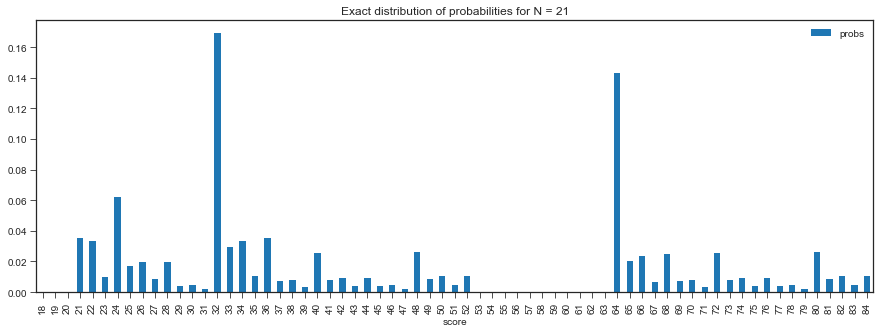

In [70]:
probs21=func(N=21,target=21)
plot_distribution([{'score':i,'probs':d} for i,d in enumerate(probs21)][18:],title="Exact distribution of probabilities for N = 21")
#plot_distribution(func(target=13))

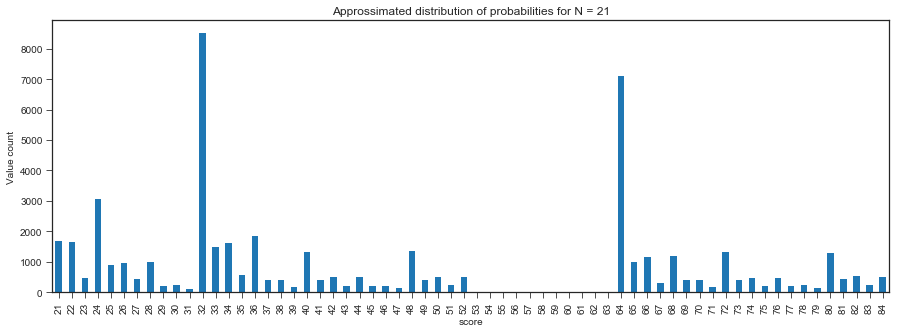

In [71]:
values,expected_value_a=simulation(N=21)
plot_distribution(values,hist=True,title="Approssimated distribution of probabilities for N = 21")

C:\Program Files\Anaconda2\envs\py35\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


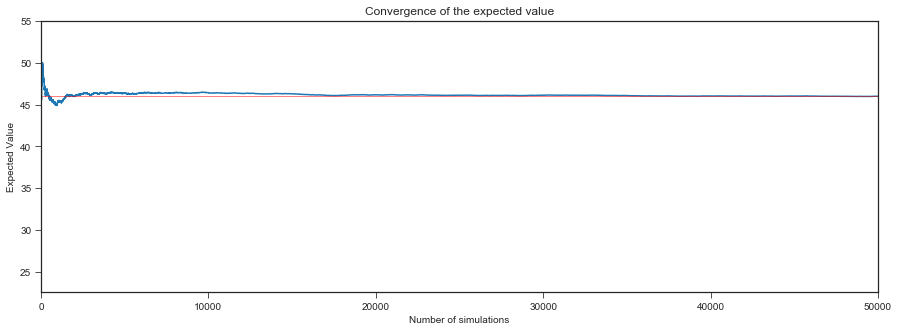

In [72]:
exact_expecte_value_21=0
for i,p in enumerate(probs21):
    exact_expecte_value_21+=i*p
# print(exact_expecte_value_21)
# print(expected_value_a[-1])
plot_expected_value(expected_value_a,exactvalue=exact_expecte_value_21,title="Convergence of the expected value")


In [73]:
print ("Answer a: {}".format(exact_expecte_value_21))

Answer a: 46.00489342582423


## b. the standard deviation of your score if N = 21

In [74]:
variance = 0
for i,p in enumerate(probs21):
    variance+=(i-exact_expecte_value_21)**2*p
std=math.sqrt(variance)

In [75]:
print ("Answer b: {}".format(std))

Answer b: 19.262474436647125


## c. the expected value of your score if N = 1000



1064


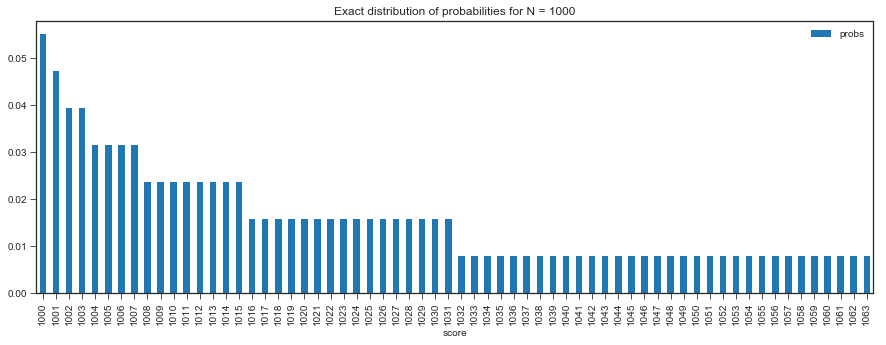

In [197]:
probs_1000=dynamic(N=1000)
plot_distribution([{'score':i+1000,'probs':d} for i,d in enumerate(probs_1000)],title="Exact distribution of probabilities for N = 1000")

In [203]:
exact_expecte_value_1000=0
for i,p in enumerate(probs_1000):
    exact_expecte_value_1000+=(i+1000)*p
variance_1000 = 0
for i,p in enumerate(probs_1000):
    variance_1000+=(i+1000-exact_expecte_value_1000)**2*p
std_1000=math.sqrt(variance)

In [202]:
print ("Answer c: {}".format(exact_expecte_value_1000))

Answer c: 1020.9999982618947


## d. the standard deviation of your score if N = 1000

In [206]:
print ("Answer d: {}".format(std_1000))

Answer d: 19.199355958368244


## e. the conditional probability that your score is less than or equal to 5 given you drew at least an 8 if N = 21

In [80]:
probs21_8=func(N=21,target=21-8,summation=8)

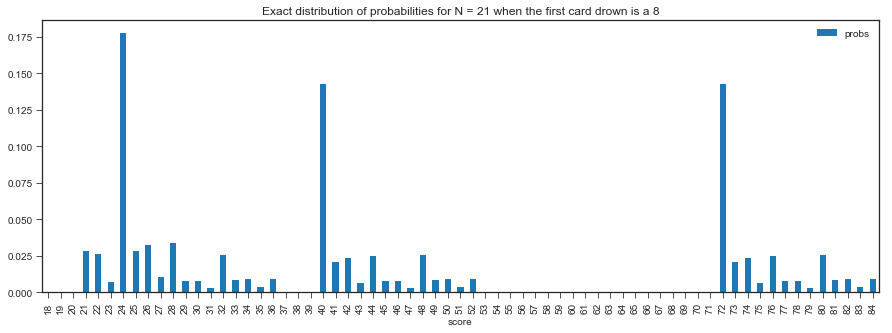

In [81]:
plot_distribution([{'score':i,'probs':d} for i,d in enumerate(probs21_8)][18:],title="Exact distribution of probabilities for N = 21 when the first card drown is a 8")

In [82]:
print ("Answer e: {}".format(sum(probs21_8[:21+5])))

Answer e: 0.26706499870629846


## f. the conditional probability that your score is less than or equal to 5 given you drew at least an 8 if N = 1000

In [83]:
values_1000_8,expected_value_a_1000_8=simulation(N=1000,start_from=8)

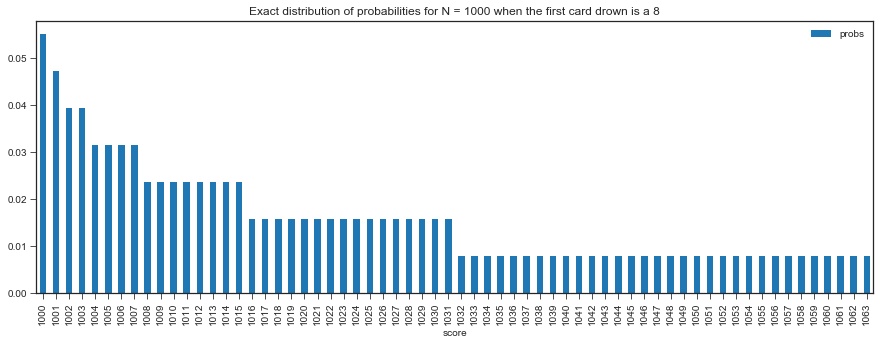

In [215]:
probs_1000_8=dynamic(N=1000,start=8)
plot_distribution([{'score':i+1000,'probs':d} for i,d in enumerate(probs_1000_8)],title="Exact distribution of probabilities for N = 1000 when the first card drown is a 8")

In [217]:
print ("Answer f: {}".format(sum(probs_1000_8[:6])))

Answer f: 0.24409446104155097


### Assume now you can choose whether each ace is worth 1 or 11 and you obviously aim for the smallest score. Calculate:

- g. the expected value of your score if N = 21;
- h. the standard deviation of your score if N = 21;
- i. the expected value of your score if N = 1000;
- l. the standard deviation of your score if N = 1000;


In [218]:
def evaluateSummationAces(part_sum,aces,N):
    aces_array=np.ones(aces)
    if part_sum + sum(aces) >= N:
        return part_sum + sum(aces)
    else:
        for index in range(aces):
            aces_array[index]=11
            if part_sum + sum(aces_array) >= N:
                return part_sum + sum(aces_array)
    return None

"""
Simulation used to aprossimate the probability distribution for each final score given a taget value (N) (aces 1 or 11) 
"""
def simulationAces(repetitions=50000,N=21,start_from=None):
    expected_value=[]
    values = []    
    for a in range(repetitions):
        if start_from is not None:
            summation=8
        else:
            summation=0
        solution=None
        aces=0
        while solution is None:
            card_picked=rd.choice(deck)
            if card_picked == 1:
                aces+=1
            else:
                summation += card_picked
            solution = evaluateSummationAces(summation,aces,N)
        values.append(float(solution))
        expected_value.append(sum(values)/(a+1))
    return values,expected_value

"""
Recursive function used to calculate the probability distribution for each final score given a taget value (N) (aces 1 or 11) 
"""


def funcAces(N=21,summation=(0,0)):
    maximum=N+max(deck)
    totals=np.zeros(maximum)
    solution = evaluateSummationAces(summation[0],summation[1],N)
    if solution is not None:
#         print(solution)
        totals[int(solution)]=1
        return totals
    for card in deck:
        if card == 1:
            new_summation=(summation[0],summation[1]+1)
        else:
            new_summation=(summation[0]+card,summation[1])
        totals += float(1)/len(deck) * funcAces(N=N,summation=new_summation)
    return totals

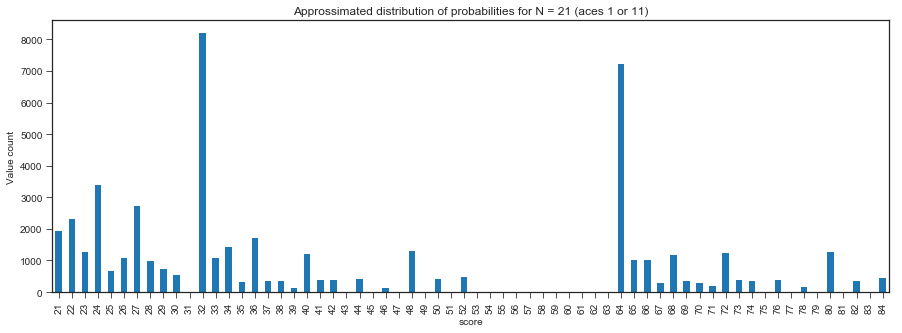

In [103]:
values,expected_value_a=simulationAces(N=21)
plot_distribution(values,hist=True,title="Approssimated distribution of probabilities for N = 21 (aces 1 or 11)")

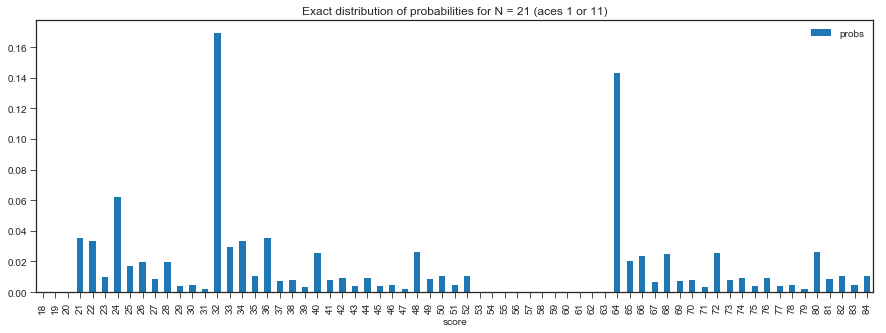

In [93]:
probs21_aces=funcAces(N=21)
plot_distribution([{'score':i,'probs':d} for i,d in enumerate(probs21)][18:],title="Exact distribution of probabilities for N = 21 (aces 1 or 11)")
#plot_distribution(func(target=13))

C:\Program Files\Anaconda2\envs\py35\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


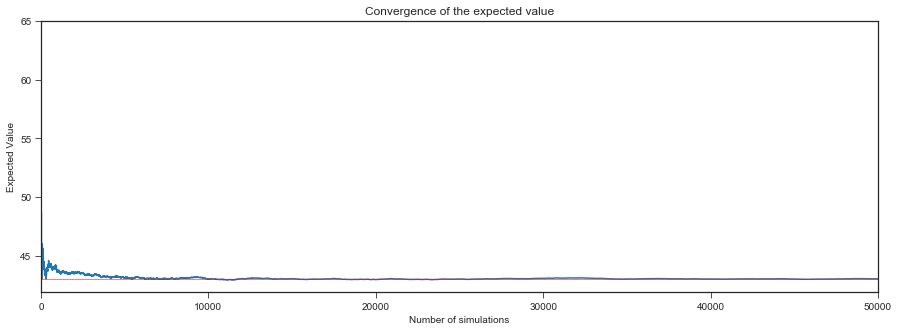

In [104]:
exact_expecte_value_21_aces=0
for i,p in enumerate(probs21_aces):
    exact_expecte_value_21_aces+=i*p
# print(exact_expecte_value_21)
# print(expected_value_a[-1])
plot_expected_value(expected_value_a,exactvalue=exact_expecte_value_21_aces,title="Convergence of the expected value")

In [102]:
print ("Answer g: {}".format(exact_expecte_value_21_aces))

Answer g: 43.02748258536045


## h. the standard deviation of your score if N = 21;

In [105]:
variance = 0
for i,p in enumerate(probs21_aces):
    variance+=(i-exact_expecte_value_21)**2*p
std=math.sqrt(variance)

In [107]:
print ("Answer h: {}".format(std))

Answer h: 19.199355958368244


## i. the expected value of your score if N = 1000;

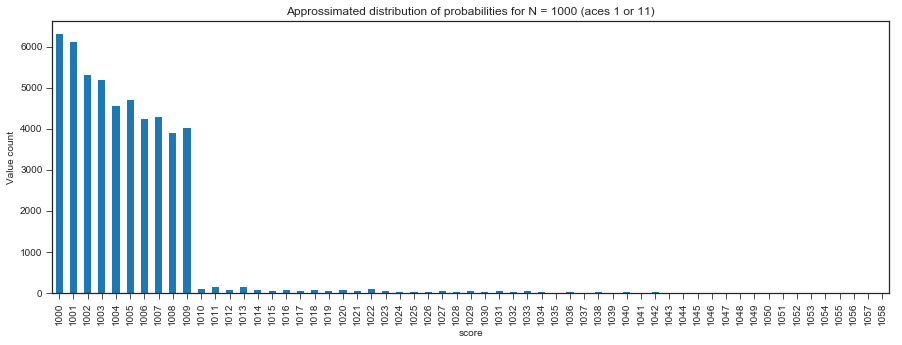

In [108]:
values,expected_value_a=simulationAces(N=1000)
plot_distribution(values,hist=True,title="Approssimated distribution of probabilities for N = 1000 (aces 1 or 11)")

C:\Program Files\Anaconda2\envs\py35\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


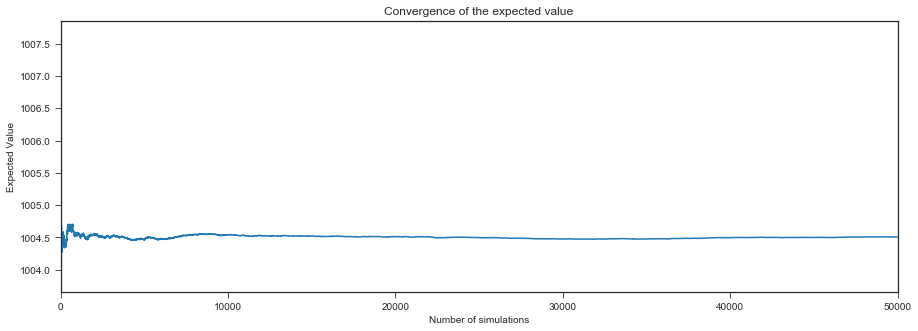

In [109]:
plot_expected_value(expected_value_a,title="Convergence of the expected value")

In [110]:
print ("Answer i: {}".format(np.mean(values)))

Answer i: 1004.50568


## l. the standard deviation of your score if N = 1000;

In [112]:
print ("Answer l: {}".format(np.std(values)))

Answer l: 4.217151614253393


## Answers:

- Answer a: 46.00489342582423
- Answer b: 19.262474436647125
- Answer c: 1020.9999982618947
- Answer d: 19.199355958368244
- Answer e: 0.26706499870629846
- Answer f: 0.24409446104155097
- Answer g: 43.02748258536045
- Answer h: 19.199355958368244
- Answer i: 1004.50568
- Answer l: 4.217151614253393